# **Introducción Regresión lineal y logística**

Fuente: https://tinyurl.com/yjx9epmh

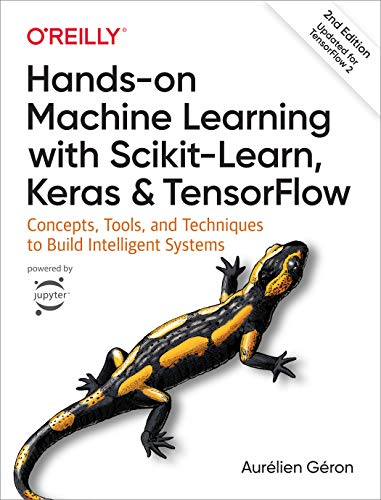

## Configuración

Se importan las librerías y modulos comunes. se verifica que matplotlib esté funcionando correctamente. Se verifica la versión de python así como la versión de scikit-learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Regresión lineal aplicando la ecuación normal.

In [2]:
import numpy as np

#creación de datos aleatorios (caracteristicas, objetivos)
X = 3 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

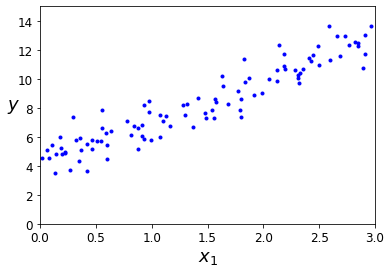

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 3, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #aplicando la ecuación normal

In [5]:
theta_best #tetha resultado de la ecuación normal

array([[4.21509616],
       [2.84674226]])

### La ecuación utilizada para generar los datos es:
 $y=4+3x_1+ \text{ruido Gausiano}$

$\hat{y}=\theta_0+\theta_1x_1$

Se observa que el **theta_best** se aproxima con $\theta_0=4.215$ y $\theta_1=2.77$. Cercano pero el ruido hace imposible que se recupere la ecuación original.

Ahora podemos realizar una predicción utilizando los valores calculados de $\hat{\theta}$.

$\hat{y}=4.215+2.77x_1$




In [6]:
X_new = np.array([[0], [1.5], [3]]) #vector con datos de entrada
X_new_b = np.c_[np.ones((3, 1)), X_new]  # add x0 = 1 to each instance (BIAS)
y_predict = X_new_b.dot(theta_best) # calculo de la predicción con tetha calculado de todos los datos
y_predict

array([[ 4.21509616],
       [ 8.48520954],
       [12.75532293]])

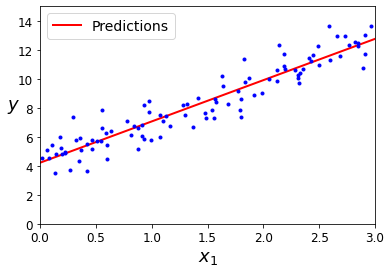

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 3, 0, 15])
plt.show()

## Aplicando la libreria sklearn:


In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.84674226]]))

In [9]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 8.48520954],
       [12.75532293]])

# Regresión lineal utilizando **batch** gradient descent

Se utilizan todos los datos disponibles en cada iteración para hacer el calculo del **GD**. Esto supondrá problemas de estancamiento, ya que el gradiente se calculará usando siempre todas las muestras, y llegará un momento en que las variaciones serán mínimas. 

Como regla general: siempre nos conviene que la entrada a una red neuronal tenga algo de aleatoriedad.

In [10]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # Aplica formula calculo del gradiente
    theta = theta - eta * gradients # actualización del valor de theta

In [11]:
theta

array([[4.21509616],
       [2.84674226]])

In [12]:
X_new = np.array([[0], [2]]) #vector con datos de entrada
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
X_new_b.dot(theta) # se realizan predicciones con los valores de entrada definidos previamente

array([[4.21509616],
       [9.90858067]])

In [13]:
theta_path_bgd = []
#Función para la implementación del gradiente descendente con tasa de aprendizaje variable. 

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 50:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


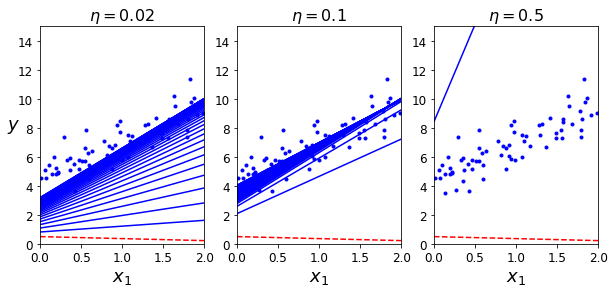

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02) # Graficar el gradiente con eta = 0.02
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd) # Graficar el gradiente con eta = 0.1
plt.subplot(133); plot_gradient_descent(theta, eta=0.5) # Graficar el gradiente con eta = 0.5
plt.show()

# Regresión Lineal utilizando Stochastic Gradient Descent

Se introduce una única muestra aleatoria en cada iteración. El gradiente se calculará para esa muestra concreta, lo que supone la introducción de la aleatoriedad, dificultando así el estancamiento. El problema de esta versión es su lentitud, ya que necesita de muchas más iteraciones, y además no aprovecha los recursos disponibles.

In [15]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

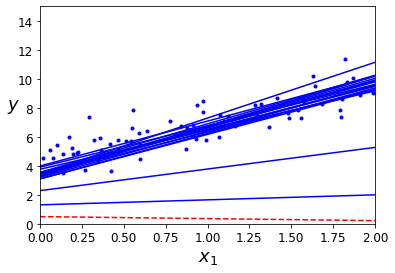

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown

plt.show()                                           # not shown

In [17]:
theta

array([[4.2136051 ],
       [2.82013578]])

## **sklearn** - Stochastic Gradient Descent

Modelo lineal ajustado minimizando una pérdida empírica regularizada con SGD.

SGD significa Stochastic Gradient Descent.

[SGD - sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.23805203]), array([2.89070511]))

# Regresión Lineal utilizando **Mini-Batch Gradient Descent**

en lugar de alimentar la red con una única muestra, se introducen N muestras en cada iteración; conservando las ventajas de la segunda versión y consiguiendo además que el entrenamiento sea más rápido debido a la paralelización de las operaciones.



1.    Se Introduce un mini-lote de entrada con N muestras aleatorias provenientes de nuestro dataset de entrenamiento, previamente etiquetado
2.   Después se realizan los cálculos pertinentes dando como resultado las predicciones a su salida.
3.   Se evalua la función de coste (también llamada función de pérdida) para dicho mini-lote.
4.   Se Calcula el gradiente como la derivada multivariable de la función de coste con respecto a todos sus parámetros.
5.   Una vez obtenido el vector gradiente, se actualizan los parámetros de la ecuación con el gradiente correspondiente, multiplicado por una tasa de aprendizaje que permite ajustar la magnitud de los pasos.
6.   Este proceso se repite para cada mini-batch. 



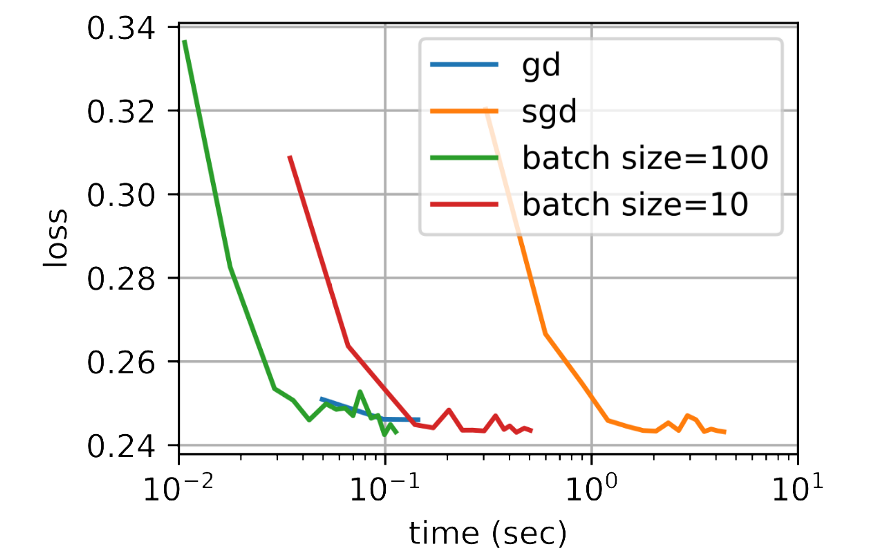

In [20]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [21]:
theta

array([[4.30998051],
       [2.95202441]])

# Resumen Grafico del comportamiento de los tipos de **Gradient Descent**

In [22]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

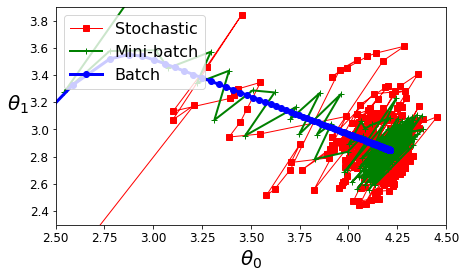

In [23]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

# Regresión Polinomial

Si los datos no se ajustan a una línea recta, es posible ajustar el modelo de regresión líneal a datos no lineales. Una manera sencilla de hacerlo es añadir potencias a cada característica como características nuevas y después entrenar un modelo lineal con el conjunto ampliado de caracteristicas.

In [24]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

### La ecuación utilizada para generar los datos es:
 $y=0.5x^2_1+x_1+2+ \text{ruido Gausiano}$





In [25]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

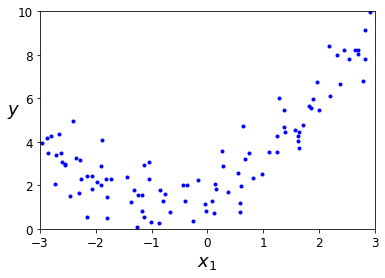

In [26]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

Se utiliza entonces la clase **PolynomialFeatuers** de **Scikit-Learn** para transformar los datos de entrenamiento, añadiendo el cuadrado de cada característica en el conjunto de entrenamiento como una nueva característica. 

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

$X_{poly}$ contiene los valores de $x_1; x^2_1$. por lo tanto se procede a realizar el entrenamiento del modelo de regresión líneal. 

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

### El modelo estimado:
 $\hat{y}=0.56x^2_1+0.93x_1+1.78$. 

 Comparando con la ecuación utilizada para generar los datos. 

$y=0.5x^2_1+x_1+2+ \text{ruido Gausiano}$





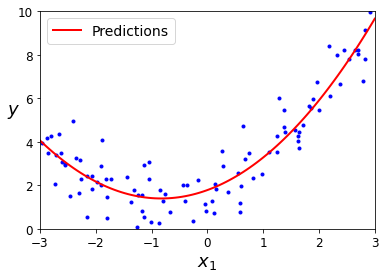

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Curvas de Aprendizaje

Si se realiza una regresión polinomial de alto grado es probable que se logre un ajuste a los datos de entrenamiento mucho mejor que con una regresión lineal simple. En la siguiente figura se compara el resultado de un modelo polinomial de grado 2, 300 y un modelo simple.


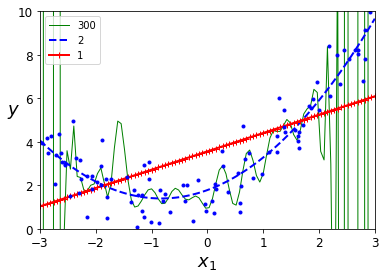

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

El modelo de regresión polinomial de grado 300 se encuentra **Sobreajustado**, mientras que el modelo lineal está **Subajustado**. El modelo que generaliza mejor en este caso es el de segundo grado. 

Es conocido que existen metricas para identificar el rendimiento de los modelos, por ejemplo la validación cruzada permite obtener una estimación del rendimiento de la generalización de un modelo. 

1. Si un modelo tiene buen rendimiento con los datos de **entrenamiento** pero generaliza mal con los **datos de prueba**, entonces está sobreajustado (**Overfitting**)

2. Si el modelo tiene un mal rendimiento en ambos casos, entonces está subajustando (**Underfitting**).

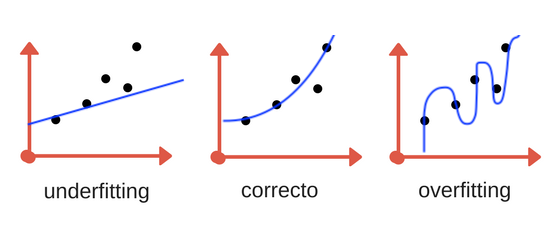

Otra forma de saber el rendimiento del modelo consiste en observr las cuervas de aprendizaje. Son gráficos del rendimiento del modelo en el conjuno de entrenamiento y el conjunto de validación como función del tamaño del conjunto de entrenamiento. 

**Curvas de aprendizaje**

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

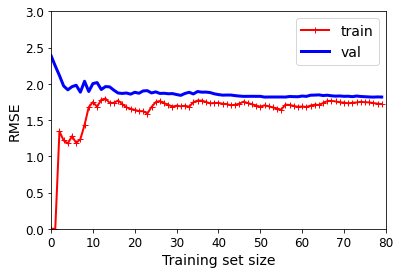

In [33]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book

plt.show()                                      # not shown

## **Modelo con underfitting.**

**modelo de línea recta para datos con comportamiento polinomial**

En el grafico anterior se observa que el error de la grafica que representa a los datos de entrenamiento empieza en cero, y a medida que se añaden instancias al modelo y no tiene la capacidad de ajustarse a dichas instancias la variación del error se estanca. 

Por el lado de los datos de validación, cuando el modelo se entrena con pocas instancias de entrenamiento es inacapaz de generalizar de manera adecuadda, razón por la cual el error de validación al principio es grande y posteriormente empieza a disminuir lentamente y termina estancandose. 

Estas curvas de aprendizaje son tipicas de un modelo con underfitting. 

Si el modelo está subajustando los datos de entrenamiento, añadir mas ejemplos no resuelve el problema, para esto es necesario usar un modelo mas complejo para obtener metricas mejores. 

## **Modelo con overfitting.**

**modelo con polinomio de alto grado para datos con comportamiento polinomial**

En la siguiente grafica se observan dos diferencias con respecto al resultado anterior. 

1. El error en los datos de entremiento es mas bajo que en el modelo anterior. 
2. hay un espacio entre las curvas. Esto significa que el modelo tiene un rendimiento bastante mejor en los datos de entrenamiento que en los de validación, lo cual es una marca distintiva de un modelo con sobreajuste. 

Una forma de mejorar un modelo que sobreajusta es introducirle mas datos de entrenamiento hasta que el error de validación llegue al error de entrenamiento. 


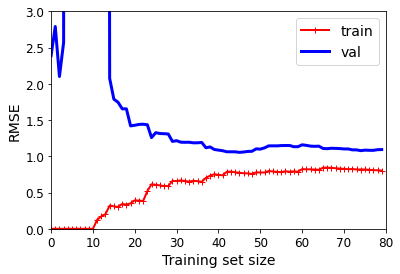

In [34]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

plt.show()                        # not shown

# Modelos lineales regularizados

Una forma dereducir el sobreajuste es regularizar el modelo (restringirlo): cuantos menos grados de libertad tenga, mas difícil le resultará sobreajstar los datos. Una manera sencilla de regularizar un modelo polinomial es reducir el número de grados polinomiales.
Para un modelo lineal, la regularización se suele conseguir mediante la limitación de los pesos del modelo. 

# Detención Temprana - Early Stop

Una forma de regularizar los algoritmos de aprendizaje iterativo como el GD, es detener el entrenamiento en cuanto el error de validaci´pon alcance un mínimo. 

En el siguiente ejemplo se tiene un modelo complejo (Regresión Polinomial de alto grado) que se está entrenando por gradiente descendente por lotes. A medida que avanzan las repeticiones, el algoritmo aprende y su error de predicción **RMSE** en el conjunto de entrenamiento baja, junto con su error de predicción en el conjunto de validación. Sin embargo con el tiempo el error de validación deja de bajar y empieza a elevarse esto indica que el modelo ha empezado a sobreajustar los datos. 


In [35]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [36]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict) ## Detección del error minimo para detenerse 
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

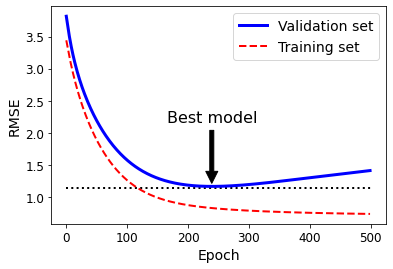

In [37]:
#Crear la Grafica

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
# guarda el comportamiento del MSE
n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [38]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

# Regresión Logística

Inicialmente se representa la función sigmoide

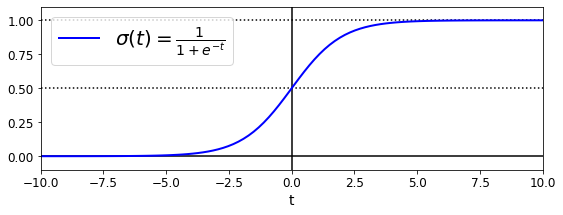

In [39]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

### Intentemos construir un clasificador para detectar el tipo Iris-Virginica basado sólo en la característica del ancho del pétalo. Primero carguemos los datos:

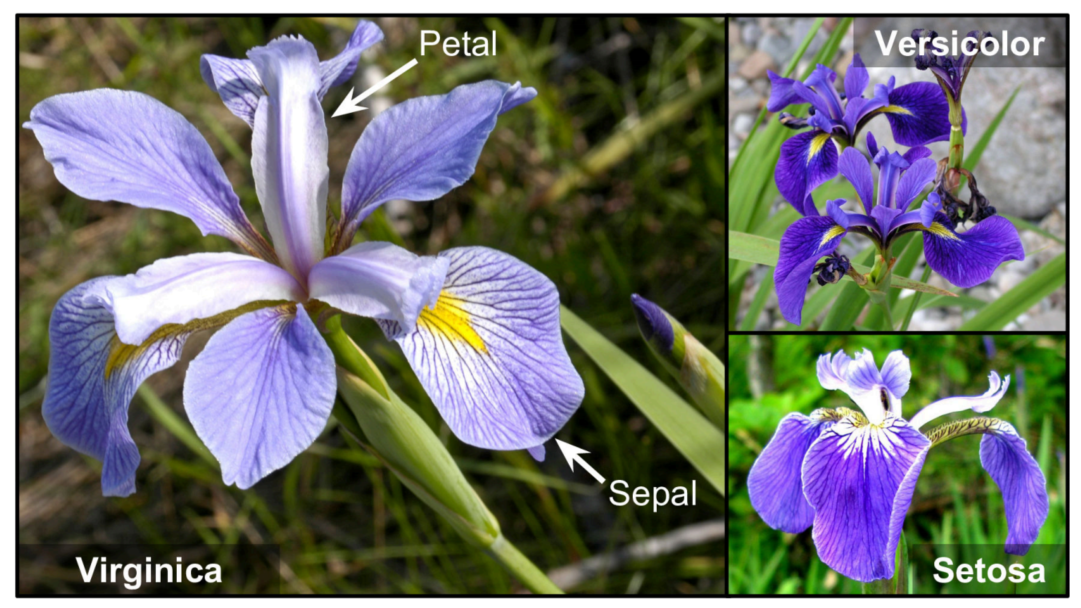

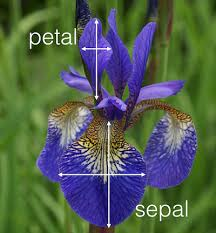

In [40]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [41]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [42]:
X = iris["data"][:, 3:]  # Ancho del petalo
#print(X)
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0
#print(y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

## Observemos las estimaciones probabilisticas del modelo para una flor con petalo con un ancho variable entre 0 y 3 cm. 

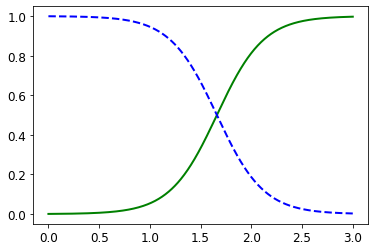

In [44]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
#print(X_new)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

La siguiente figura se acompaña con codigo para detallar el resultado. 

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


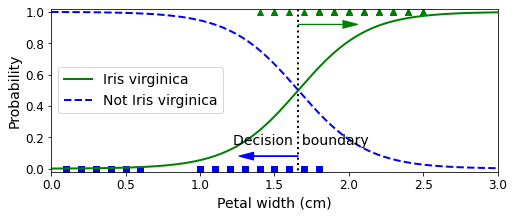

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [46]:
decision_boundary

array([1.66066066])

In [50]:
log_reg.predict([[1.7], [1.1]]) # al ingresar valores alrededor del limite de decisión se presenta la respuesta entre 1 y 0. 

array([1, 0])

La siguiente figura muestra el mismo conjunto de datos pero esta vez mostrando dos características: ancho y largo del pétalo. Una vez entrenado, el clasificador de Regresión Logística puede estimar la probabilidad de que una nueva flor sea una Iris-Virgínica basándose en estas dos características. 

La línea discontinua representa los puntos en los que el modelo estima una probabilidad del 50%: este es el límite de decisión del modelo. Nótese que es un límite lineal. Cada línea paralela representa los puntos donde el modelo produce una probabilidad específica, desde el 15% (abajo a la izquierda) hasta el 90% (arriba a la derecha). 

Todas las flores más allá de la línea superior derecha tienen más del 90% de posibilidades de siendo Iris-Virginica según el modelo.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


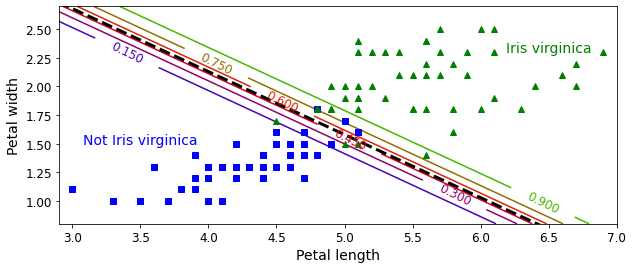

In [51]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# Softmax

Usemos la Regresión Softmax para clasificar las flores lirio en las tres clases.La Regresión Logística de ScikitLearn usa "uno contra todo" por defecto cuando se entrena con más de dos clases, pero se puede configurar el hiperparámetro multi_clase a "multinomio" para cambiarlo a Regresión Softmax en su lugar. 

También debe especificar un solver que soporte la Regresión Softmax, como el solver "lbfgs" (ver la documentación de Scikit-Learn para más detalles). También aplica la regularización ℓ2 por defecto, que puede controlar usando el hiperparámetro C.

In [52]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

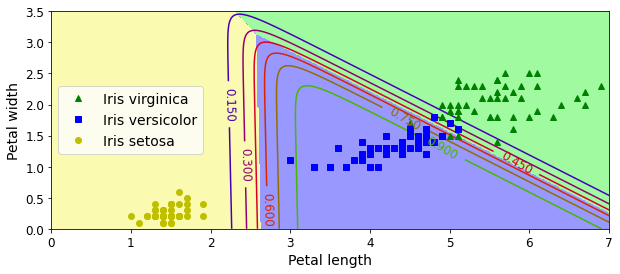

In [53]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

Validando un lirio con pétalos de **5 cm de largo y 2 cm de ancho**, el modelo puede estimar que tipo de lirio es, y responderá Iris-Virginica (clase 2) con un 94,2% de probabilidad (o Iris-Versicolor con un 5,8% de probabilidad):

In [60]:
softmax_reg.predict([[1, 2.0]])

array([0])

In [63]:
prob = np.round(softmax_reg.predict_proba([[5, 2]]),2)
print(prob)

[[0.   0.06 0.94]]
